In [2]:
from talib import abstract
import matplotlib.pyplot as plt
from ModelManager import ModelManager
import pandas as pd
modelManager = ModelManager()
df = pd.read_csv("rawData/twSharePrice-20200306.csv")

In [34]:
df

,Unnamed: 0,date,tradedQty,tradedPrice,open,high,low,close,diff,vol
0,0,2020-03-06,"86,372,942","26,864,484,400",308.0,317.0,308.0,315.0,-5.00,"35,320"
1,1,2020-03-05,"55,169,411","17,534,766,696",318.5,320.0,316.0,323.0,+6.50,"20,713"
2,2,2020-03-04,"44,745,146","14,304,795,666",322.0,322.0,317.0,320.5,+3.00,"16,118"
3,3,2020-03-03,"38,223,525","12,392,618,100",325.0,326.0,323.0,317.5,+2.50,"15,107"
4,4,2020-03-02,"52,807,760","16,733,485,610",320.0,320.5,315.0,311.0,-8.00,"24,175"
...,...,...,...,...,...,...,...,...,...,...
1943,1943,2012-04-09,"33,319,546","2,803,922,726",83.8,84.6,83.6,83.0,+0.30,"7,216"
1944,1944,2012-04-06,"49,611,004","4,186,151,236",84.9,84.9,83.9,83.8,-0.40,"6,924"
1945,1945,2012-04-05,"21,066,491","1,764,147,209",84.2,84.2,83.5,83.1,-0.20,"7,253"
1946,1946,2012-04-03,"118,848,912","10,407,797,340",87.0,89.8,86.0,85.0,+2.00,"22,211"


In [35]:
df = df.drop(['Unnamed: 0'], axis =1)

In [36]:
df.index = df.date

In [37]:
df = df.drop(['date'], axis =1)

In [38]:
mask = df != '--'
df = df[mask]

/Users/macbookpro4eric/opt/anaconda3/envs/dataSience/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [39]:
df = df[['open', 'high', 'low', 'close']].astype(float)

In [40]:
df.dtypes

open     float64
high     float64
low      float64
close    float64
dtype: object

In [41]:
macd = abstract.MACD(df)

In [42]:
macd.index = df.index

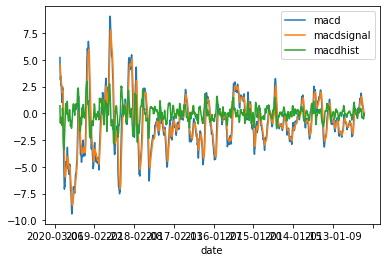

In [43]:
macd.plot()

In [44]:
kd = abstract.STOCH(df)

In [45]:
kd.index = df.index

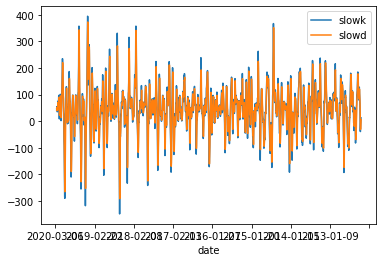

In [46]:
kd.plot()

In [47]:
df.shape

(1948, 4)

In [19]:
pd.merge(df,kd,left_index=True, right_index=True )

,open,high,low,close,slowk,slowd
date,,,,,,
2020-02-21,83.6,83.6,82.7,81.7,64.646465,62.193362
2020-02-20,79.0,82.7,78.9,82.8,65.393939,63.885522
2020-02-19,82.6,83.4,82.1,83.8,82.973995,71.004800
2020-02-18,83.0,85.6,83.0,83.4,83.139833,77.169256
2020-02-17,85.8,86.3,84.7,83.9,79.662355,81.925394
...,...,...,...,...,...,...
2016-04-08,80.0,81.2,80.0,81.9,67.149390,75.099049
2016-04-07,79.9,80.2,79.3,81.5,79.305798,74.021648
2016-04-06,80.0,80.2,78.6,81.2,93.998016,80.151068


In [48]:
rsi = abstract.RSI(df)

In [54]:
rsi.name = 'rsi'

In [59]:
ma5 = abstract.MA(df,5)

In [60]:
ma5.name = 'ma5'

In [50]:
df = pd.merge(df,kd,left_index=True, right_index=True )

In [55]:
df = pd.merge(df,rsi, left_index=True, right_index=True)

In [58]:
df = pd.merge(df,macd, left_index=True, right_index=True)

In [61]:
df = pd.merge(df,ma5, left_index=True, right_index=True)

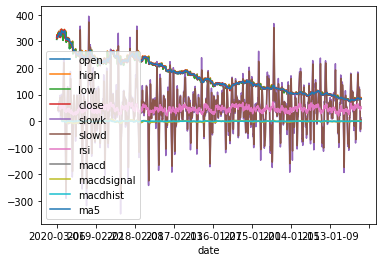

In [64]:
df.plot()

In [63]:
df.to_excel("techAna.xlsx")